In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = 'Microsoft Yahei'

数据均来自[国家卫健委官网](http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml "With a Title")

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
data = pd.read_csv('2019_nCoV_data.csv',encoding = 'GB2312', parse_dates=['截止时间'], date_parser=dateparse)
confirmed = data['确诊数']
suspected = data['疑似数']
cured = data['治愈数']
dead = data['死亡数']
suspected_diff = data['新增疑似'][1:]
close_contacts = data['密切接触']
day = data['截止时间']

t = [i for i in range(1, len(data)+1)]
t = np.array(t)
data

,截止时间,确诊数,疑似数,治愈数,死亡数,新增疑似,密切接触
0,2020-01-10,41,0,2,1,0,739
1,2020-01-11,41,0,6,1,0,763
2,2020-01-12,41,0,7,1,0,763
3,2020-01-13,41,0,7,1,0,763
4,2020-01-14,41,0,7,1,0,763
5,2020-01-15,41,0,7,1,0,763
6,2020-01-16,41,0,12,2,0,763
7,2020-01-17,41,0,13,2,0,763
8,2020-01-18,45,0,15,2,0,763
9,2020-01-19,62,0,19,2,0,763


In [3]:
actual_diff = confirmed - confirmed.shift()
actual_diff.dropna(inplace = True)
day2 = day[1:]

### 疫情趋势图

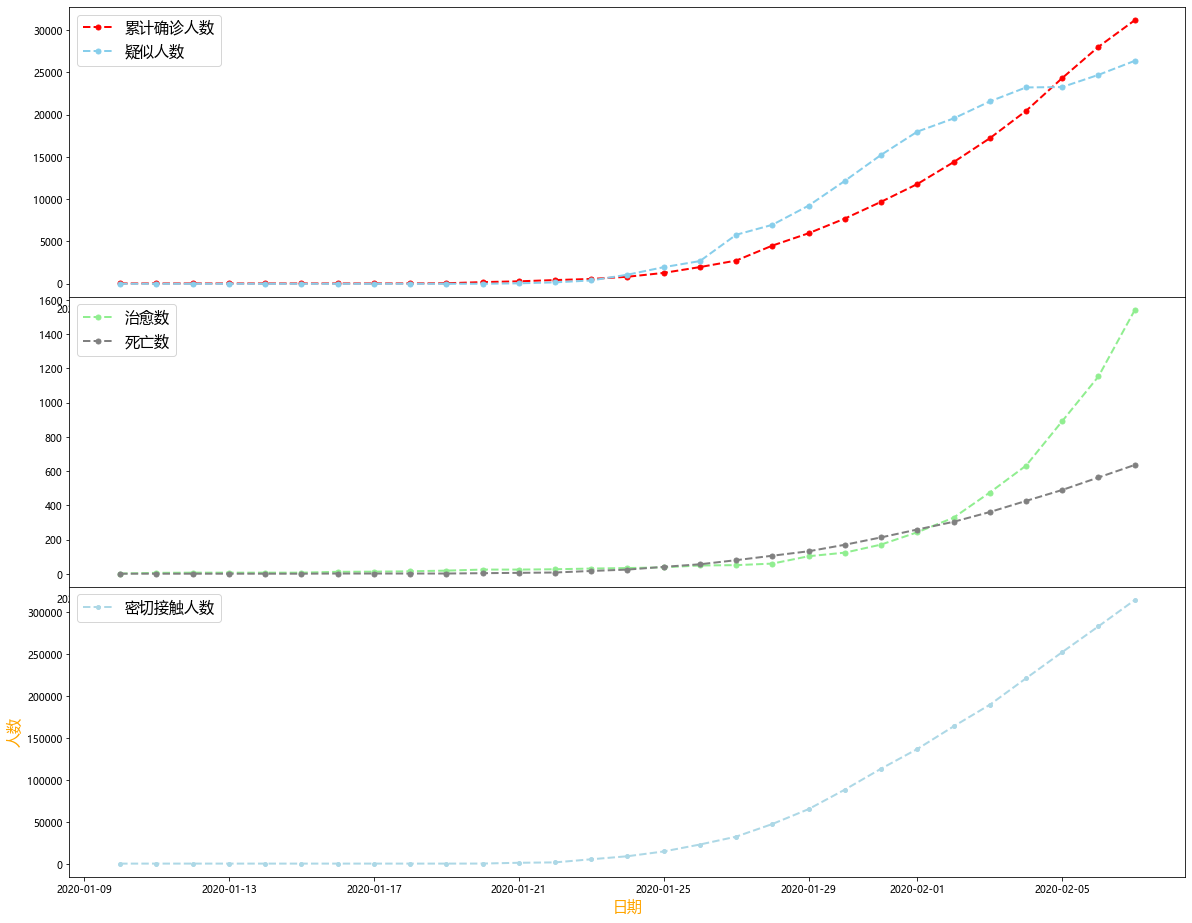

In [4]:
fig, axes = plt.subplots(3,1,figsize = (20,16))
plt.subplots_adjust(wspace=0,hspace=0)
plt.ylabel('人数',fontsize = 15, rotation=90,color = 'orange')
plt.xlabel("日期",fontsize = 15, rotation=0,color = 'orange')
#图1：确诊数与疑似数
axes[0].plot(day, confirmed, 'go--', linewidth=2, markersize=5, color = 'red', label='累计确诊人数')
axes[0].plot(day, suspected, 'go--', linewidth=2, markersize=5, color = 'skyblue', label='疑似人数')
axes[0].legend(loc='best',fontsize = 15)
#图2：治愈数与死亡数
axes[1].plot(day, cured, 'go--', linewidth=2, markersize=5, color = 'lightgreen', label='治愈数')
axes[1].plot(day, dead, 'go--', linewidth=2, markersize=5, color = 'gray', label='死亡数')
axes[1].legend(loc='best',fontsize = 15)
#图3：密切接触者
axes[2].plot(day, close_contacts, 'go--', linewidth=2, markersize=4, color = 'lightblue', label='密切接触人数')
axes[2].legend(loc='best',fontsize = 15)
plt.savefig('img/all_count.jpg',dpi = 1000,bbox_inches='tight')

### 疫情新增趋势图

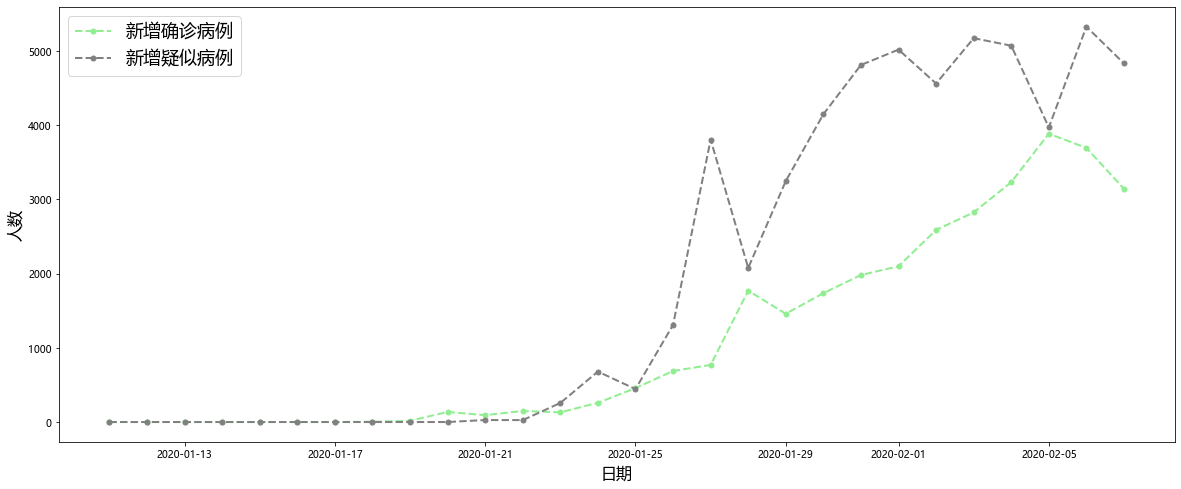

In [5]:
plt.subplots(figsize = (20,8))
plt.plot(day2, actual_diff, 'go--', linewidth = 2, markersize = 5, color = 'lightgreen', label='新增确诊病例')
plt.plot(day2, suspected_diff, 'go--', linewidth = 2, markersize = 5, color = 'gray', label='新增疑似病例')
plt.xlabel('日期', fontsize = 16)
plt.ylabel('人数', fontsize = 16)
plt.legend(loc = 'best', fontsize = 18)
plt.show()

In [6]:
def logistic_increase_function(t, K, P0, r):
    t0 = 1
    exp_value=np.exp(r*(t-t0))
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)

popt, pcov = curve_fit(logistic_increase_function, t, confirmed)
K, P0, r = popt[0], popt[1], popt[2]
print(popt)

[4.57557452e+04 1.94671077e+01 3.03741459e-01]


In [7]:
predict = logistic_increase_function(t, K, P0, r).astype('int')
#预测未来n天
n = 30
future=[i for i in range(len(data)+1, len(data)+n+1)]
future=np.array(future)
future_predict=logistic_increase_function(future, K, P0, r).astype('int')
future_predict

array([33864, 36338, 38409, 40095, 41438, 42488, 43298, 43916, 44383,
       44735, 44997, 45194, 45339, 45448, 45528, 45587, 45631, 45664,
       45688, 45705, 45718, 45728, 45735, 45740, 45744, 45747, 45749,
       45751, 45752, 45753])

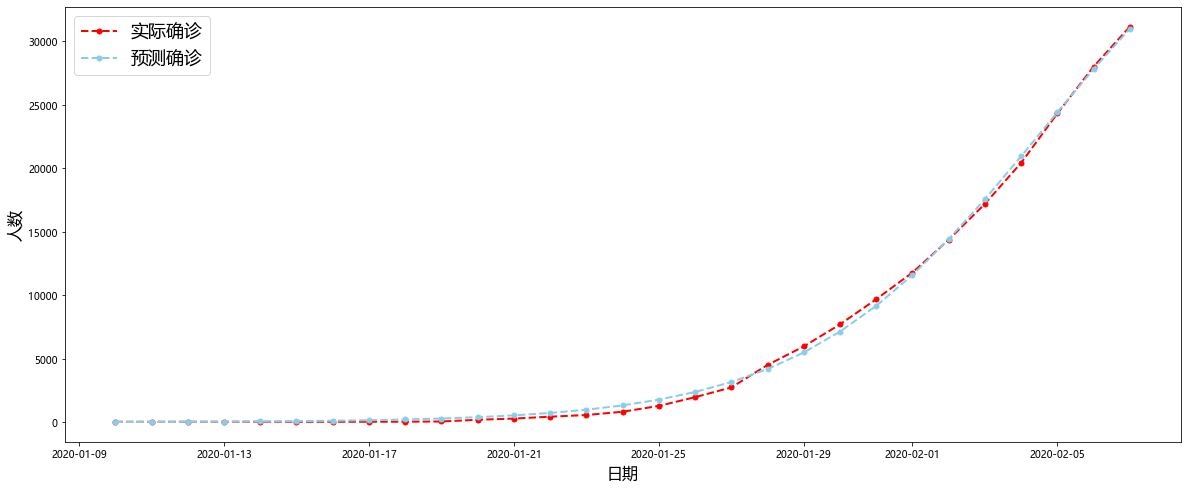

In [8]:
plt.subplots(figsize = (20,8))
plt.plot(day, confirmed, 'go--', linewidth = 2, markersize = 5, color = 'red', label='实际确诊')
plt.plot(day, predict, 'go--', linewidth = 2, markersize = 5, color = 'skyblue', label='预测确诊')
plt.xlabel('日期', fontsize = 16)
plt.ylabel('人数', fontsize = 16)
plt.legend(loc = 'best', fontsize = 18)
plt.savefig('img/confirmed.jpg')
plt.show()

### 预测确诊人数

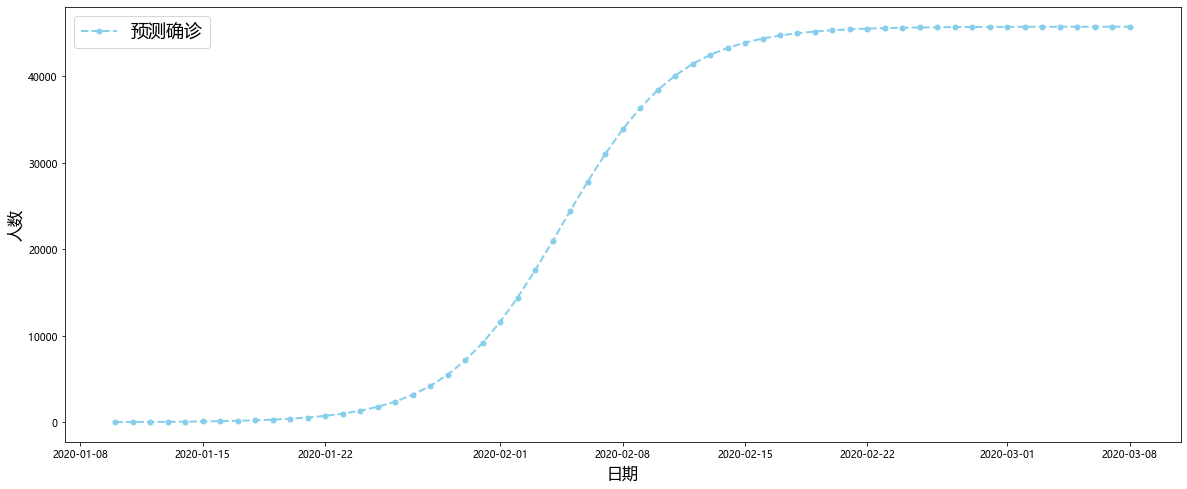

In [9]:
import datetime
all_predict = np.concatenate([predict, future_predict],axis=0)
all_predict = all_predict.astype('int')
all_day = [(day[0]+datetime.timedelta(days=i)) for i in range(n+len(day))]
plt.subplots(figsize = (20,8))
plt.plot(all_day, all_predict, 'go--', linewidth = 2, markersize = 5, color = 'skyblue', label = '预测确诊')
plt.xlabel('日期', fontsize = 16)
plt.ylabel('人数', fontsize = 16)
plt.legend(loc = 'best', fontsize = 18)
plt.savefig('img/future_pre_confirmed.jpg')
plt.show()

### 预测明日确诊人数

In [10]:
tomorrow = all_day[len(day)].strftime('%m{}%d{}').format('月', '日')
tomorrow_predict = int(future_predict[0])
print('预测{}累计确诊人数为{}'.format(tomorrow, tomorrow_predict))

预测02月08日累计确诊人数为33864


### 每日新增确诊人数

In [11]:
pre = pd.Series(predict, index= day)
predict_diff = pre - pre.shift()
predict_diff.dropna(inplace=True)

actual_diff = confirmed - confirmed.shift()
actual_diff.dropna(inplace=True)
day2 = day[1:]

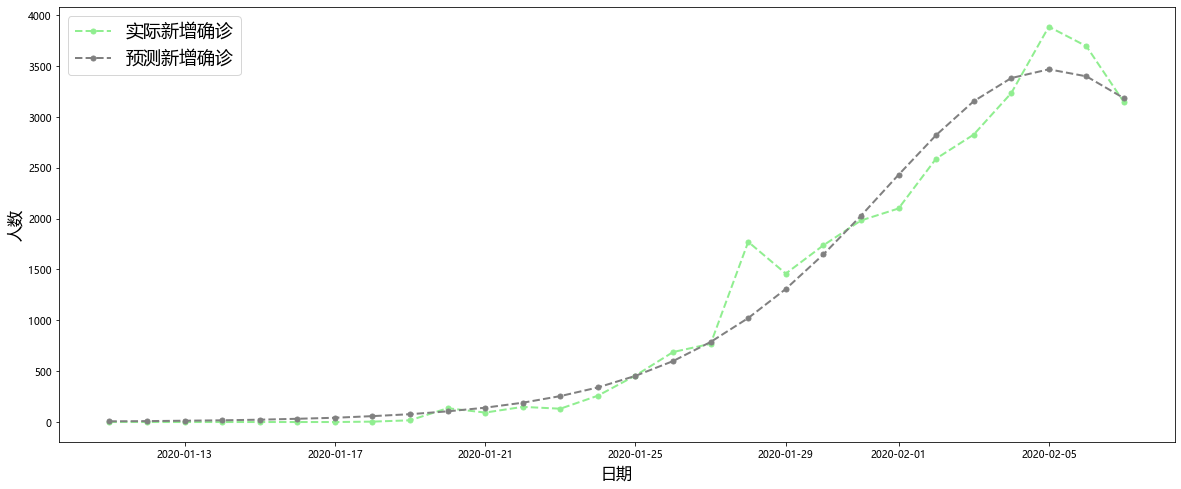

In [12]:
plt.subplots(figsize = (20,8))
plt.plot(day2, actual_diff, 'go--', linewidth = 2, markersize = 5, color = 'lightgreen', label='实际新增确诊')
plt.plot(day2, predict_diff, 'go--', linewidth = 2, markersize = 5, color = 'gray', label='预测新增确诊')
plt.xlabel('日期', fontsize = 16)
plt.ylabel('人数', fontsize = 16)
plt.legend(loc = 'best', fontsize = 18)
plt.savefig('img/increment.jpg')
plt.show()

## 实际加预测新增确诊情况

In [13]:
act_pre = np.concatenate([confirmed.values, future_predict],axis=0)
actual_pre = pd.Series(act_pre, index= all_day)
actual_pre_diff = actual_pre - actual_pre.shift()
actual_pre_diff.dropna(inplace=True)
day3 = all_day[len(day)-1:]
future_diff = actual_pre_diff[len(day)-2:]

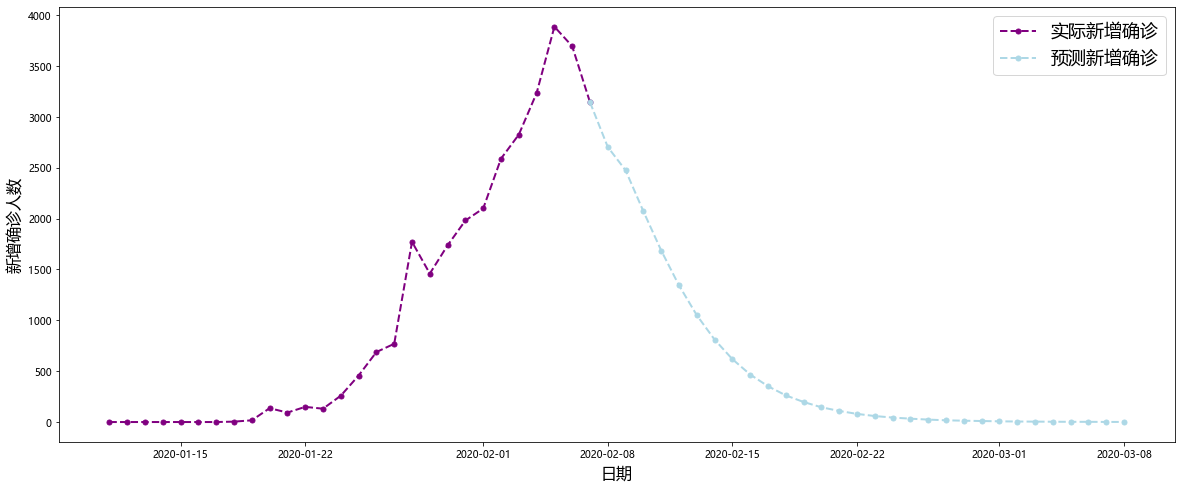

紫色曲线为实际值，绿色曲线为预测值


<Figure size 432x288 with 0 Axes>

In [14]:
plt.subplots(figsize = (20,8))
plt.plot(day2, actual_diff, 'go--', linewidth = 2, markersize = 5, color = 'purple', label='实际新增确诊')
plt.plot(day3, future_diff, 'go--', linewidth = 2, markersize = 5, color = 'lightblue', label='预测新增确诊')
plt.xlabel('日期', fontsize = 16)
plt.ylabel('新增确诊人数', fontsize = 16)
plt.legend(loc = 'best', fontsize = 18)
plt.show()
plt.savefig('img/actual_pre.jpg')
print('紫色曲线为实际值，绿色曲线为预测值')